# POS Visualisieren

1 [Datensatz Original](#dataset_ori)

1.1 [fehlerhafte POS entfernen](#pos_ori)

1.2 [most common words](#words_ori)

1.3 [Poinplots](#point_ori)

1.4 [Wordcloud](#wordcloud_ori)

1.5 [Verteilung der Figuren](#figure_ori)

1.6 [Interaktionen](#paar_ori)

1.7 [Verteilung der Paare](#tuple_ori)

2 [Datensatz Fanfiction](#dataset_fan)

2.1 [fehlerhafte POS entfernen](#pos_fan)

2.2 [most common words](#words_fan)

2.3 [Poinplots](#point_fan)

2.4 [Wordcloud](#wordcloud_fan)

2.5 [Verteilung der Figuren](#figure_fan)

2.6 [Interaktionen](#paar_fan)

2.7 [Verteilung der Paare](#tuple_fan)

Hier werden die häufigsten Adjektive, Verben und Nomen pro Figur als Counplot angezeigt. 
Im zweiten Schritt werden die Wörter zwischen zwei Figuren analysiert. 

## 1 Datensatzsatz Original <a class="anchor" id="dataset_ori"></a>
### 1.1 Fehlerhafte POS entfernen <a class="anchor" id="pos_ori"></a>

In [1]:
#Dataframe laden
import pandas as pd

df = pd.read_csv("Kwic/kwic_original_pos.csv")

In [2]:
df.set_index('index', inplace = True)

In [3]:
list(df.index.unique())

['sirius',
 'ginny',
 'blaise',
 'seamus',
 'harry',
 'ron',
 'voldemort',
 'hermine',
 'snape',
 'dumbledore',
 'draco']

In [64]:
df

,-5,adjectives,verbs,nouns
index,,,,
sirius,stanley blätterte titelseite zurück kiekste b...,['kiekst'],"['blättern', 'sagen']","['Stanley', 'Black']"
sirius,las black immer freiem fuß black wohl berücht...,"['frei', 'berüchtigt']",[],"['Fuß', 'Gefangen']"
sirius,tötete harry sah überschatteten augen black e...,"['überschattet', 'einzig', 'eingesunken']","['töten', 'sehen']","['Harry', 'Auge', 'Black', 'Partie', 'Gesicht']"
sirius,verschwunden war gaben klein bei black gehört...,['zweiter'],"['verschwinden', 'sein', 'geben', 'hören', 'de...","['Black', 'Mann']"
sirius,sagte stan begutachtete erneut zeitungsfoto b...,['ausgemergelt'],"['sagen', 'begutachten', 'haben']","['Stan', 'Black', 'Gesicht']"
...,...,...,...,...
draco,zitterte voldemorts hand harry umschloss zaub...,[],"['zittern', 'umschließen', 'wissen']","['Hand', 'Harry', 'Moment']"
draco,größter hoffnung himmel flehend schrie zauber...,['groß'],"['schreien', 'zielen']","['Hoffnung', 'Himmel', 'Avada', 'Kedavra', 'Ex..."
draco,mr malfoy stand da hand schulter gelegt sah h...,['höhnisch'],"['stehen', 'legen', 'sehen']","['Hand', 'Schulter', 'Blick']"


In [4]:
# fehlerhafte POS entfernen
verbs_unactiv = ['erzählen','kannen','nicken', 'finden','setzen','bleiben', 'nehmen', "sagen", "haben", "sein", "sehen", "gehen", "fragen", "werden", "kommen", "lassen", "machen", "hören", "denken", "stehen", "rufen", "blicken", "tun", "geben", "scheinen", "herminen", "sprechen", "antworten", "meinen", "wissen"]
adjectives_remove = ['pat', 'drach','ganz','ausgefahren', 'umhangsaum', 'schnippt','crabb', 'üblich','starrt','erster', "hagrid", "pott", "plötzlich", "wirklich", "offenbar", "erneut", "nickt", "wang", "versucht", "schüttelt", "erwidert", 'öffnet', 'spürt', 'granger', 'le']
verbs_remove = ["herminen"]
nouns_remove = ['Luna','Dean', 'Michael','Neville','Goyle', 'Crabbe', 'Narzissa','Lucius', 'Voldemort','James','Harry', 'Ron', 'Dumbledore', 'Hagrid', 'Snape', 'Lupin', 'Weasley', 'Fred', 'Nein', 'nans', 'Hermine', 'George', 'Vernon', 'Dudley', 'Neville', 'Jaah', 'Percy', 'Granger', 'Na', 'Draco', 'Tom', 'Remus', 'Blaise', 'Dracos', 'Hermione', 'Seamus', 'Hermines', 'Bill', 'Arthur']

In [5]:
# Spalten in Dataframe bearbeiten
import re
df['adjectives'] = df.adjectives.str.replace(r"(\b" + '\\b|\\b'.join(adjectives_remove) + r"\b)", 'nan', regex=True)
df['verbs'] = df.verbs.str.replace(r"(\b" + '\\b|\\b'.join(verbs_remove) + r"\b)", 'nan', regex=True)
df['verbs_activ'] = df.verbs.str.replace(r"(\b" + '\\b|\\b'.join(verbs_unactiv) + r"\b)", 'nan', regex=True)
df['noun_w_names'] = df.nouns.str.replace(r"(\b" + '\\b|\\b'.join(nouns_remove) + r"\b)", 'nan', regex = True)

In [6]:
# für jede Figur anhand des Indexes ein eigenes Dataframe erstellen
df_harry = df[df.index == "harry"]
df_hermine = df[df.index == "hermine"]
df_ron = df[df.index == "ron"]
df_draco = df[df.index == "draco"]
df_voldemort = df[df.index == "voldemort"]
df_dumbledore = df[df.index == "dumbledore"]
df_snape = df[df.index == "snape"]
df_blaise = df[df.index == 'blaise']
df_seamus = df[df.index == 'seamus']
df_sirius = df[df.index == 'sirius']
df_ginny = df[df.index == 'ginny']

### 1.2 most common words <a class="anchor" id="words_ori"></a>

In [7]:
def get_most_common_df (series, number_of_words):
    '''
    Returns df with most common words.

            Parameters:
                    series (series): pd.series
                    number_of_words(int): number of most words
    '''
    
    from ast import literal_eval
    from collections import Counter

    noun_liste = series.apply(literal_eval).sum()
    
    
    words = Counter(noun_liste)
    words.pop('nan', None)
    words.pop('nans', None)

    dict_words = dict(words.most_common(number_of_words))
    
    df = pd.DataFrame.from_dict(dict_words, orient='index')
    
    return df

In [56]:
# Aufrufen der Funktion 
df2 = get_most_common_df(df_ginny.noun_w_names, 25)

#### Plotten der n häufigsten Adjektive, Nomen, Verben pro Figur

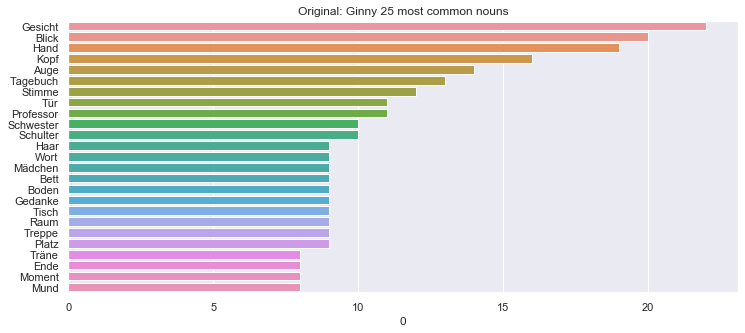

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.barplot(x=0, y=df2.index, data=df2)
plt.title("Original: Ginny 25 most common nouns")
plt.savefig("Kwic/images/Original/Most_Words/original_Ginny_nouns_w_names.png", bbox_inches='tight')

### 1.3 Poinplots <a class="anchor" id="point_ori"></a>
Es werden verschiedene Figuren hinsichtlich ihrer Wörter miteinander verglichen.

In [123]:
def get_most_common_dict (series, number_of_words):
    '''
    Returns dict with most common words.

            Parameters:
                    series (series): pd.series
                    number_of_words(int): number of most words
                    
    '''
    
    from ast import literal_eval
    from collections import Counter

    noun_liste = series.apply(literal_eval).sum()
    #noun_liste.remove("sagen")
    
    words = Counter(noun_liste)
    words.pop('nan', None)
    words.pop('nans', None)
    dict_words = dict(words.most_common(number_of_words))
    
    
    return dict_words

In [189]:
#dictionary pro Figur generieren
harry_dict = get_most_common_dict(df_harry.noun_w_names, 20)
ron_dict = get_most_common_dict(df_dumbledore.noun_w_names, 20)
hermine_dict = get_most_common_dict(df_voldemort.noun_w_names, 20)
#draco_dict = get_most_common_dict(df_draco.adjectives, 20)

In [190]:
#dictionary zusammenführen
all_dict = pd.DataFrame([harry_dict, ron_dict, hermine_dict])
all_dict = all_dict.fillna(0)
#liste_delete = all_dict.columns[all_dict.isna().any()].tolist()
#all_dict = all_dict.drop(liste_delete, axis=1)
all_dict.iloc[ 0 , : ].index

Index(['Auge', 'Hand', 'Kopf', 'Blick', 'Gesicht', 'Professor', 'Tür',
       'Stimme', 'Wort', 'Moment', 'Boden', 'Seite', 'Zeit', 'Mund', 'Onkel',
       'Tisch', 'Haus', 'Bett', 'Luft', 'Schulter', 'Büro', 'Schule', 'Jahr',
       'Mann', 'Schreibtisch', 'Tod', 'Schulleiter', 'Fudge', 'Lord',
       'Schlange', 'Narbe', 'Name', 'Tagebuch', 'Riddle', 'Zauberer', 'Herr',
       'Wurmschwanz'],
      dtype='object')

In [191]:
all_dict

,Auge,Hand,Kopf,Blick,Gesicht,Professor,Tür,Stimme,Wort,Moment,...,Fudge,Lord,Schlange,Narbe,Name,Tagebuch,Riddle,Zauberer,Herr,Wurmschwanz
0,707,696,602,583,539,497.0,443.0,387,303,258.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,124,92,63,63,73,264.0,59.0,57,62,50.0,...,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,86,47,26,23,49,0.0,0.0,27,26,0.0,...,0.0,185.0,42.0,40.0,36.0,33.0,30.0,30.0,30.0,24.0


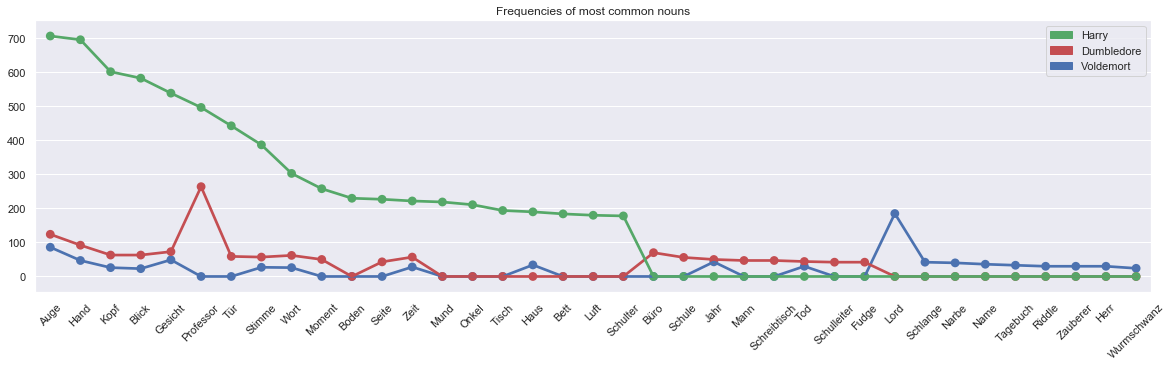

In [192]:
import seaborn as sns
import matplotlib.patches as mpatches
green = mpatches.Patch(color='g', label='Harry')
red = mpatches.Patch(color='r', label='Dumbledore')
blue = mpatches.Patch(color='b', label='Voldemort')
#yellow = mpatches.Patch(color='y', label='Draco')


fig, ax = plt.subplots(figsize=(20,5))
ax = sns.pointplot(x=all_dict.iloc[ 2 , : ].index, y=all_dict.iloc[ 2 , : ].values,color='b')
ax = sns.pointplot(x= all_dict.iloc[ 1 , : ].index, y=all_dict.iloc[ 1 , : ].values, color='r')
ax = sns.pointplot(x = all_dict.iloc[ 0 , : ].index, y=all_dict.iloc[ 0 , : ].values, color='g')
#ax = sns.pointplot(x = all_dict.iloc[ 3 , : ].index, y=all_dict.iloc[ 3 , : ].values, color='y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title("Frequencies of most common nouns")
plt.legend(handles=[green, red, blue])
plt.savefig("Kwic/images/Original/PointPlot/original_frequency_nouns_four.png", bbox_inches='tight')

### 1.4 Wordcloud <a class="anchor" id="wordcloud_ori"></a>
Für jede Figur wird ein Counter-Dictionary erstellt, aus dem dann eine Wortwolke generiert wird.

In [58]:
#Counter dictionary pro Figur erstellen
def get_wordcloud_dict (series1, series2, series3):
    
    '''
    Returns dict with most common words.

            Parameters:
                    series1 (series): pd.series1
                    series2 (series): pd.series2
                    series3 (series): pd.series3
                    
                    
    '''
    from collections import Counter
    from ast import literal_eval
    
    liste_one= series1.apply(literal_eval).sum()
    liste_two = series2.apply(literal_eval).sum()
    liste_three = series3.apply(literal_eval).sum()
    joinedlist = liste_one + liste_two + liste_three
    word_cloud_dict=Counter(joinedlist)
    word_cloud_dict.pop('nan', None)
    word_cloud_dict.pop('nans', None)
    
    return(word_cloud_dict)


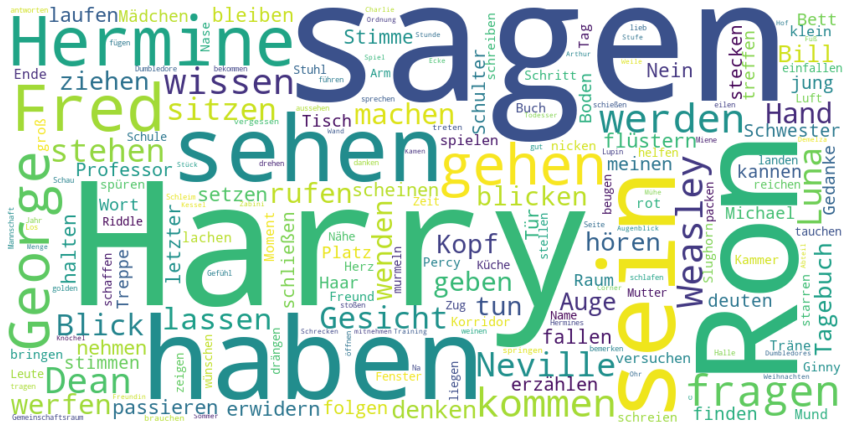

In [60]:
from wordcloud import WordCloud

word_cloud_dict = get_wordcloud_dict(df_ginny.nouns, df_ginny.verbs, df_ginny.adjectives)

wordcloud = WordCloud(width = 1000, height = 500, background_color="white").generate_from_frequencies(word_cloud_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.show()
plt.savefig("Kwic/images/Original/WordClouds/original_wordcloud_ginny.png", bbox_inches='tight')
#plt.close()

#### Wordcloud von Verben, Adjektiven und Nomen pro Figur

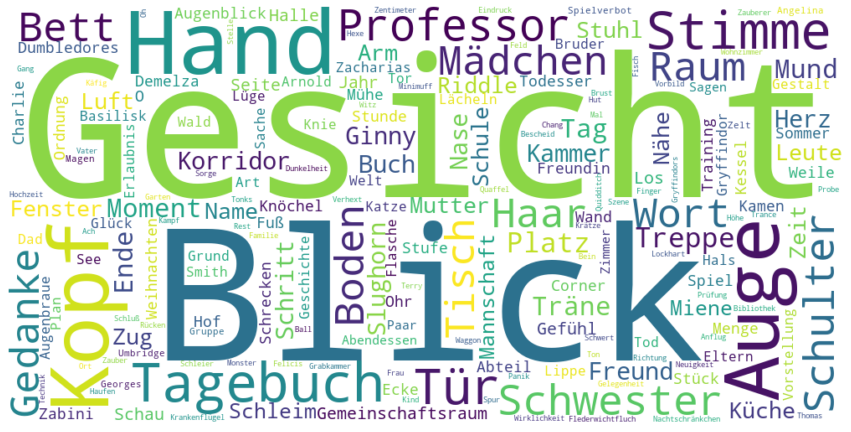

In [66]:
from wordcloud import WordCloud

from collections import Counter
from ast import literal_eval
    
liste_one= df_ginny.noun_w_names.apply(literal_eval).sum()
    
word_cloud_dict=Counter(liste_one)
word_cloud_dict.pop('nan', None)
word_cloud_dict.pop('nans', None)

wordcloud = WordCloud(width = 1000, height = 500, background_color="white").generate_from_frequencies(word_cloud_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.show()
plt.savefig("Kwic/images/Original/WordClouds/original_wordcloud_nouns_ginny.png", bbox_inches='tight')
#plt.close()

### 1.5 Verteilung der Figuren <a class="anchor" id="figure_ori"></a>
Die prozentuale Erwähnung pro Figur werden als Kreisdiagramm dargestellt.

In [68]:
len(df_ginny)

773

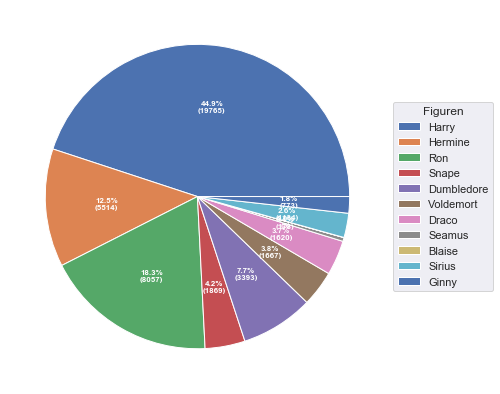

In [69]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"))

recipe = ["19765 Harry",
          "5514 Hermine",
          "8057 Ron",
          "1869 Snape", 
         "3394 Dumbledore",
         "1668 Voldemort", 
         "1621 Draco",
         '178 Seamus',
         '6 Blaise', '1134 Sirius', '773 Ginny']

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Figuren",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")


plt.savefig("Kwic/images/Original/PiePlot/original_verteilung_concordance.png", bbox_inches='tight')

Sowohl Harry als auch Hermine und Ron haben die meisten Einträge in der Concordance-Matrix der Originaltexte.

### 1.6 Interaktionen <a class="anchor" id="paar_ori"></a>
Kontexte zwischen zwei Figuren werden ausgewertet.

In [8]:
# Hermine und Ron 
df_hermine1 = df_hermine[df_hermine['nouns'].str.contains('Ron')]
df_hermine2 = df_hermine[df_hermine['nouns'].str.contains('Weasley')]
df_hermine3 = df_hermine[df_hermine['nouns'].str.contains('Ronald')]
df_ron1 = df_ron[df_ron['nouns'].str.contains('Hermine')]
df_ron2 = df_ron[df_ron['nouns'].str.contains('Granger')]
df_hermine_ron = pd.concat([df_hermine1, df_ron1, df_hermine2, df_hermine3, df_ron2])

In [9]:
# Hermine und Draco
df_hermine1 = df_hermine[df_hermine['nouns'].str.contains('Draco')]
df_hermine2 = df_hermine[df_hermine['nouns'].str.contains('Malfoy')]
df_draco1 = df_draco[df_draco['nouns'].str.contains('Hermine')]
df_draco2 = df_draco[df_draco['nouns'].str.contains('Granger')]
df_hermine_draco = pd.concat([df_hermine1, df_draco1, df_hermine2, df_draco2])

In [10]:
# Hermine und Ginny
df_hermine1 = df_hermine[df_hermine['nouns'].str.contains('Ginny')]
df_ginny1 = df_ginny[df_ginny['nouns'].str.contains('Hermine')]
df_ginny2 = df_ginny[df_ginny['nouns'].str.contains('Granger')]
df_hermine_ginny = pd.concat([df_hermine1, df_ginny1, df_ginny2])

In [11]:
# Hermine und Harry
df_hermine1 = df_hermine[df_hermine['nouns'].str.contains('Harry')]
df_harry1 = df_harry[df_harry['nouns'].str.contains('Hermine')]
df_harry2 = df_harry[df_harry['nouns'].str.contains('Granger')]
df_hermine_harry = pd.concat([df_hermine1, df_harry1, df_harry2])

In [12]:
# Harry und Ron
df_harry1 = df_harry[df_harry['nouns'].str.contains('Ron')]
df_harry2 = df_harry[df_harry['nouns'].str.contains('Weasley')]
df_harry3 = df_harry[df_harry['nouns'].str.contains('Ronald')]
df_ron1 = df_ron[df_ron['nouns'].str.contains('Harry')]

df_harry_ron = pd.concat([df_harry1, df_ron1, df_harry2, df_harry3])

In [13]:
# Harry und Draco
df_harry1 = df_harry[df_harry['nouns'].str.contains('Draco')]
df_harry2 = df_harry[df_harry['nouns'].str.contains('Malfoy')]
df_draco1 = df_draco[df_draco['nouns'].str.contains('Harry')]

df_harry_draco = pd.concat([df_harry1, df_draco1, df_harry2])

In [14]:
# Harry und Ginny
df_harry1 = df_harry[df_harry['nouns'].str.contains('Ginny')]

df_ginny = df_ginny[df_ginny['nouns'].str.contains('Harry')]

df_harry_ginny = pd.concat([df_harry1, df_ginny])

In [15]:
# Harry und Voldemort
df_harry1 = df_harry[df_harry['nouns'].str.contains('Voldemort')]
df_harry2 = df_harry[df_harry['nouns'].str.contains('Riddle')]
df_voldemort1 = df_voldemort[df_voldemort['nouns'].str.contains('Harry')]

df_harry_voldemort = pd.concat([df_harry1, df_voldemort1, df_harry2])

In [16]:
# Blaise und Seamus
df_seamus1 = df_seamus[df_seamus['nouns'].str.contains('Blaise')]
df_seamus2 = df_seamus[df_seamus['nouns'].str.contains('Zabini')]
df_blaise1 = df_blaise[df_blaise['nouns'].str.contains('Seamus')]
df_blaise2 = df_blaise[df_blaise['nouns'].str.contains('Finnigan')]

df_blaise_seamus = pd.concat([df_seamus1, df_seamus2, df_blaise1, df_blaise2])

In [17]:
len(df_hermine_draco)

56

In [18]:
len(df_hermine_ginny)

69

In [63]:
%%time
df2 = get_most_common_df(df_harry_voldemort.verbs_activ,25)

Wall time: 8.99 ms


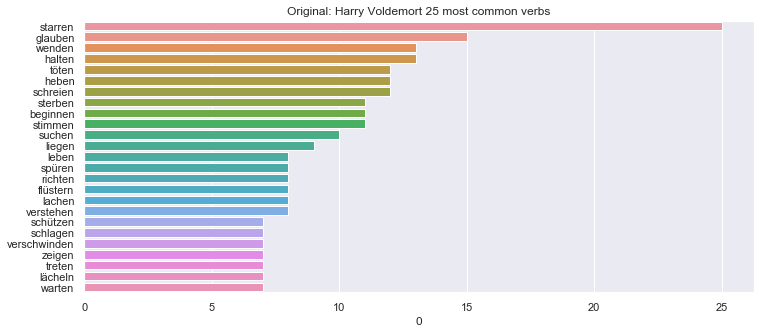

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.barplot(x=0, y=df2.index, data=df2)
plt.title("Original: Harry Voldemort 25 most common verbs")
plt.savefig("Kwic/images/Original/Interaktion/original_Harry_Voldemort_verbs.png", bbox_inches='tight')

### 1.7 Verteilung der Paare <a class="anchor" id="tuple_ori"></a>

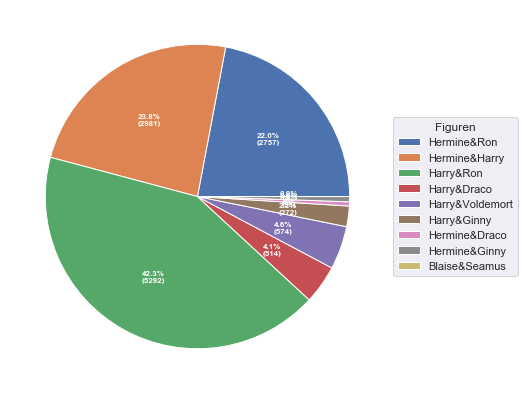

In [35]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"))

recipe = ["2758 Hermine&Ron",
          "2982 Hermine&Harry",
          "5292 Harry&Ron",
          "514 Harry&Draco", 
         "575 Harry&Voldemort",'273 Harry&Ginny', '56 Hermine&Draco', '69 Hermine&Ginny',
         "0 Blaise&Seamus", ]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Figuren",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")


plt.savefig("Kwic/images/Original/PiePlot/original_verteilung_tuples.png", bbox_inches='tight')

Die Grafik zeigt, dass Harry und Ron am häufigsten miteinander agieren. Wohingegen Blaise und Seamus nicht zusammen auftauchen.

## 2 Datensatz Fanfiction <a class="anchor" id="dataset_fan"></a>
### 2.1 fehlerhafte POS entfernen <a class="anchor" id="pos_fan"></a>

In [36]:
#Dataframe laden
import pandas as pd

df = pd.read_csv("Kwic/POS_FanFic/kwic_fanfic_pos.csv")

In [37]:
df.set_index('index', inplace = True)

In [38]:
list(df.index.unique())

['sirius',
 'ginny',
 'blaise',
 'seamus',
 'ron',
 'voldemort',
 'hermine',
 'harry',
 'snape',
 'dumbledore',
 'draco']

In [39]:
df

,-5,adjectives,verbs,nouns
index,,,,
sirius,fünften band ein askaban geflohene black dumb...,"['fünfter', 'geflohen']",[],"['Band', 'Grimmauldplatz', 'Nummer']"
sirius,halten ja kreischte halle für black ja für al...,[],"['halten', 'kreischen']","['Halle', 'Black']"
sirius,geht erklärte ich verstehe wer fragte caius s...,[],"['gehen', 'erklären', 'verstehen', 'fragen']",[]
sirius,verstehe wer sirius fragte caius orion black ...,['gut'],"['verstehen', 'fragen']",['Freund']
sirius,fixierte neugierig kein black letzte wurde du...,"['fixiert', 'letzter']","['werden', 'wissen']",['Black']
...,...,...,...,...
draco,scorpius sah fühlte an lügen vermutung mädche...,['schnell'],"['sehen', 'fühlen', 'lügen', 'sein']","['Scorpius', 'Vermutung', 'Mädchen', 'Herz']"
draco,es lügner fühlenstattdessen griff langsam han...,"['fühlenstattdessen', 'langsam']","['greifen', 'liegen', 'halten']","['Lügner', 'Hand', 'Knie']"
draco,toast erlaubte ihr schulter sitzen brief umsc...,['scorpiusich'],"['erlauben', 'sitzen', 'ziehen']","['Toast', 'Schulter', 'Brief', 'Umschlag']"


In [40]:
# fehlerhafte POS entfernen
verbs_unactiv = ['nevillen','erzählen','kannen','nicken', 'finden','setzen','bleiben', 'nehmen',"sagen", "haben", "sein", "sehen", "gehen", "fragen", "werden", "kommen", "lassen", "machen", "hören", "denken", "stehen", "rufen", "blicken", "tun", "geben", "scheinen", "herminen", "sprechen", "antworten", "meinen", "wissen"]
adjectives_remove = ['pat', 'drach','ganz','grinst', 'zuckt','theodor','ausgefahren', 'umhangsaum', 'schnippt','crabb', 'üblich','starrt','erster', "hagrid", "pott", "plötzlich", "wirklich", "offenbar", "erneut", "nickt", "wang", "versucht", "schüttelt", "erwidert", 'öffnet', 'spürt', 'granger', 'le']
verbs_remove = ["herminen"]
nouns_remove = ['Finnigan', 'Hey', 'Dean', 'Thomas','Zabini', 'Theo','Neville','Goyle', 'Crabbe', 'Narzissa','Lucius', 'Voldemort','James','Harry', 'Ron', 'Dumbledore', 'Hagrid', 'Snape', 'Lupin', 'Weasley', 'Fred', 'Nein', 'nans', 'Hermine', 'George', 'Vernon', 'Dudley', 'Neville', 'Jaah', 'Percy', 'Granger', 'Na', 'Draco', 'Tom', 'Remus', 'Blaise', 'Dracos', 'Hermione', 'Seamus', 'Hermines', 'Bill', 'Arthur']

In [41]:
import re
df['adjectives'] = df.adjectives.str.replace(r"(\b" + '\\b|\\b'.join(adjectives_remove) + r"\b)", 'nan', regex=True)
df['verbs'] = df.verbs.str.replace(r"(\b" + '\\b|\\b'.join(verbs_remove) + r"\b)", 'nan', regex=True)
df['verbs_activ'] = df.verbs.str.replace(r"(\b" + '\\b|\\b'.join(verbs_unactiv) + r"\b)", 'nan', regex=True)
df['noun_w_names'] = df.nouns.str.replace(r"(\b" + '\\b|\\b'.join(nouns_remove) + r"\b)", 'nan', regex = True)

In [42]:
# Für jede Figur ein Dataframe erstellen
df_harry = df[df.index == "harry"]
df_hermine = df[df.index == "hermine"]
df_ron = df[df.index == "ron"]
df_draco = df[df.index == "draco"]
df_voldemort = df[df.index == "voldemort"]
df_dumbledore = df[df.index == "dumbledore"]
df_snape = df[df.index == "snape"]
df_blaise = df[df.index == "blaise"]
df_seamus = df[df.index == "seamus"]
df_sirius = df[df.index == "sirius"]
df_ginny = df[df.index == "ginny"]

Sample verwenden, um Memory Issues usw. zu vermeiden

In [43]:
df_harry_sample = df_harry.sample(50000)
df_hermine_sample = df_hermine.sample(50000)
df_ron_sample = df_ron.sample(50000)
df_draco_sample = df_draco.sample(50000)
df_voldemort_sample = df_voldemort.sample(50000)
df_dumbledore_sample = df_dumbledore.sample(50000)
df_snape_sample = df_snape.sample(50000)
df_blaise_sample = df_blaise.sample(50000)
df_seamus_sample = df_seamus
df_sirius_sample = df_sirius.sample(50000)
df_ginny_sample = df_ginny.sample(50000)

### 2.2 most common words <a class="anchor" id="words_fan"></a>

In [109]:
%%time
df2 = get_most_common_df(df_ginny_sample.adjectives,25)

Wall time: 4.01 s


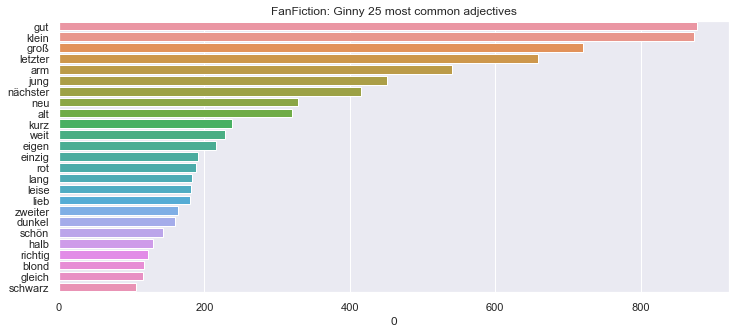

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.barplot(x=0, y=df2.index, data=df2)
plt.title("FanFiction: Ginny 25 most common adjectives")
plt.savefig("Kwic/images/FanFic/Words_Most/fanfic_Ginny_adjectives.png", bbox_inches='tight')

### 2.3 Poinplots <a class="anchor" id="point_fan"></a>

In [169]:
#dictionary pro Figur generieren
harry_dict = get_most_common_dict(df_blaise_sample.noun_w_names, 20)
ron_dict = get_most_common_dict(df_seamus_sample.noun_w_names, 20)
hermine_dict = get_most_common_dict(df_draco_sample.noun_w_names, 20)
draco_dict = get_most_common_dict(df_harry_sample.noun_w_names, 20)

In [170]:
#dictionary zusammenführen
all_dict = pd.DataFrame([harry_dict, ron_dict, hermine_dict, draco_dict])
all_dict = all_dict.fillna(0)
#liste_delete = all_dict.columns[all_dict.isna().any()].tolist()
#all_dict = all_dict.drop(liste_delete, axis=1)
all_dict.iloc[ 0 , : ].index

Index(['Freund', 'Hand', 'Auge', 'Blick', 'Kopf', 'Gesicht', 'Tür', 'Zeit',
       'Bett', 'Zimmer', 'Moment', 'Wort', 'Schulter', 'Seite', 'Tag',
       'Gedanke', 'Stimme', 'Raum', 'Tisch', 'Haus', 'Halle', 'Parvati',
       'Gryffindor', 'Gemeinschaftsraum', 'Vater', 'Lippe', 'Mund', 'Mutter',
       'Mann', 'Professor', 'Kapitel'],
      dtype='object')

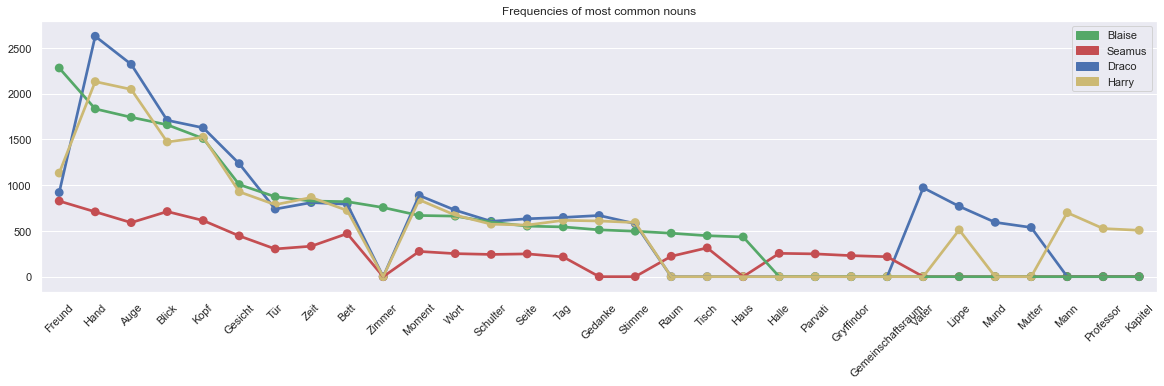

In [171]:
import seaborn as sns
import matplotlib.patches as mpatches
green = mpatches.Patch(color='g', label='Blaise')
red = mpatches.Patch(color='r', label='Seamus')
blue = mpatches.Patch(color='b', label='Draco')
yellow = mpatches.Patch(color='y', label='Harry')


fig, ax = plt.subplots(figsize=(20,5))
ax = sns.pointplot(x=all_dict.iloc[ 2 , : ].index, y=all_dict.iloc[ 2 , : ].values,color='b')
ax = sns.pointplot(x= all_dict.iloc[ 1 , : ].index, y=all_dict.iloc[ 1 , : ].values, color='r')
ax = sns.pointplot(x = all_dict.iloc[ 0 , : ].index, y=all_dict.iloc[ 0 , : ].values, color='g')
ax = sns.pointplot(x = all_dict.iloc[ 3 , : ].index, y=all_dict.iloc[ 3 , : ].values, color='y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title("Frequencies of most common nouns")
plt.legend(handles=[green, red, blue, yellow])
plt.savefig("Kwic/images/FanFic/PointPlot/fanfic_frequency_nouns_five.png", bbox_inches='tight')

### 2.4 Wordcloud <a class="anchor" id="wordcloud_fan"></a>

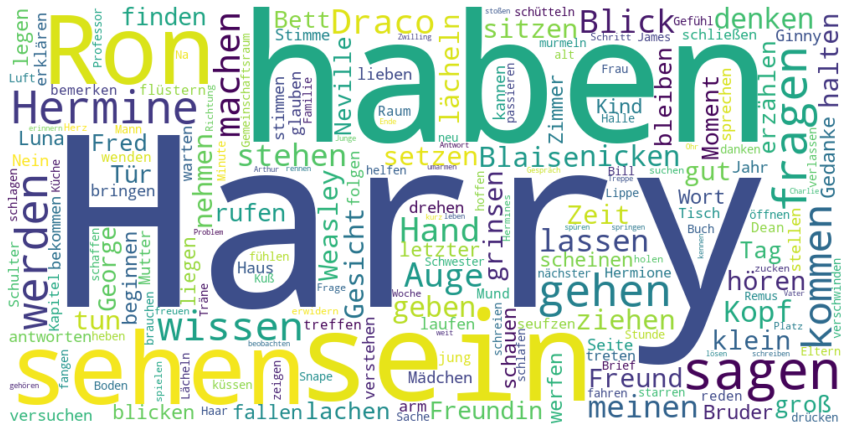

In [112]:
from wordcloud import WordCloud

word_cloud_dict = get_wordcloud_dict(df_ginny_sample.nouns, df_ginny_sample.verbs, df_ginny_sample.adjectives)

wordcloud = WordCloud(width = 1000, height = 500, background_color="white").generate_from_frequencies(word_cloud_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.show()
plt.savefig("Kwic/images/FanFic/WordClouds/fanfic_wordcloud_ginny.png", bbox_inches='tight')
#plt.close()

#### Wordcloud von Adjektiven, Nomen und Verben pro Figur

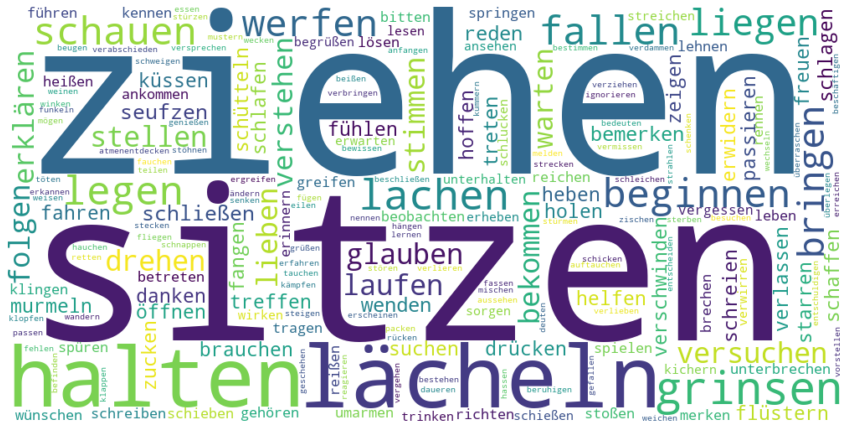

In [118]:
from wordcloud import WordCloud

from collections import Counter
from ast import literal_eval
    
liste_one= df_ginny_sample.verbs_activ.apply(literal_eval).sum()
    
word_cloud_dict=Counter(liste_one)
word_cloud_dict.pop('nan', None)
word_cloud_dict.pop('nans', None)

wordcloud = WordCloud(width = 1000, height = 500, background_color="white").generate_from_frequencies(word_cloud_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.show()
plt.savefig("Kwic/images/FanFic/WordClouds/fanfic_wordcloud_verbs_ginny.png", bbox_inches='tight')
#plt.close()

### 2.5 Verteilung der Figuren <a class="anchor" id="figure_fan"></a> 

In [120]:
len(df_ginny)

206607

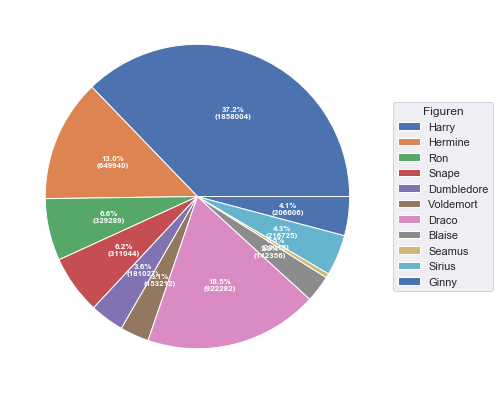

In [121]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"))

recipe = ["1858005 Harry",
          "649940 Hermine",
          "329289 Ron",
          "311045 Snape", 
         "181028 Dumbledore",
         "153212 Voldemort", 
         "922282 Draco", '142356 Blaise', '23016 Seamus', '216726 Sirius', '206607 Ginny']

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Figuren",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")


plt.savefig("Kwic/images/FanFic/PiePlot/fanfic_verteilung_concordance.png", bbox_inches='tight')

Auch in den Fanfictiontexten taucht Harry am häufigsten als Charakter auf. Anschließend folgt Draco, der eine höhere Frequenz aufweist als Hermine und Ron. Zudem erkennt man ein Ansteigen der Figur Blaise, die in den Originalbänden kaum Erwähnung findet. 

### 2.6 Interaktionen <a class="anchor" id="paar_fan"></a>

In [30]:
# Hermine und Ron 
df_hermine1 = df_hermine[df_hermine['nouns'].str.contains('Ron')]
df_hermine2 = df_hermine[df_hermine['nouns'].str.contains('Weasley')]
df_hermine3 = df_hermine[df_hermine['nouns'].str.contains('Ronald')]
df_ron1 = df_ron[df_ron['nouns'].str.contains('Hermine')]
df_ron2 = df_ron[df_ron['nouns'].str.contains('Granger')]
df_hermine_ron = pd.concat([df_hermine1, df_ron1, df_hermine2, df_hermine3, df_ron2])

In [44]:
# Hermine und Draco
df_hermine1 = df_hermine[df_hermine['nouns'].str.contains('Draco')]
df_hermine2 = df_hermine[df_hermine['nouns'].str.contains('Malfoy')]
df_draco1 = df_draco[df_draco['nouns'].str.contains('Hermine')]
df_draco2 = df_draco[df_draco['nouns'].str.contains('Granger')]
df_hermine_draco = pd.concat([df_hermine1, df_draco1, df_hermine2, df_draco2])

In [45]:
# Hermine und Ginny
df_hermine1 = df_hermine[df_hermine['nouns'].str.contains('Ginny')]
df_ginny1 = df_ginny[df_ginny['nouns'].str.contains('Hermine')]
df_ginny2 = df_ginny[df_ginny['nouns'].str.contains('Granger')]
df_hermine_ginny = pd.concat([df_hermine1, df_ginny1, df_ginny2])

In [31]:
# Hermine und Harry
df_hermine1 = df_hermine[df_hermine['nouns'].str.contains('Harry')]
df_harry1 = df_harry[df_harry['nouns'].str.contains('Hermine')]
df_harry2 = df_harry[df_harry['nouns'].str.contains('Granger')]
df_hermine_harry = pd.concat([df_hermine1, df_harry1, df_harry2])

In [32]:
# Harry und Ron
df_harry1 = df_harry[df_harry['nouns'].str.contains('Ron')]
df_harry2 = df_harry[df_harry['nouns'].str.contains('Weasley')]
df_harry3 = df_harry[df_harry['nouns'].str.contains('Ronald')]
df_ron1 = df_ron[df_ron['nouns'].str.contains('Harry')]

df_harry_ron = pd.concat([df_harry1, df_ron1, df_harry2, df_harry3])

In [33]:
# Harry und Draco
df_harry1 = df_harry[df_harry['nouns'].str.contains('Draco')]
df_harry2 = df_harry[df_harry['nouns'].str.contains('Malfoy')]
df_draco1 = df_draco[df_draco['nouns'].str.contains('Harry')]

df_harry_draco = pd.concat([df_harry1, df_draco1, df_harry2])

In [34]:
# Harry und Ginny
df_harry1 = df_harry[df_harry['nouns'].str.contains('Ginny')]

df_ginny = df_ginny[df_ginny['nouns'].str.contains('Harry')]

df_harry_ginny = pd.concat([df_harry1, df_ginny])

In [35]:
# Harry und Voldemort
df_harry1 = df_harry[df_harry['nouns'].str.contains('Voldemort')]
df_harry2 = df_harry[df_harry['nouns'].str.contains('Riddle')]
df_voldemort1 = df_voldemort[df_voldemort['nouns'].str.contains('Harry')]

df_harry_voldemort = pd.concat([df_harry1, df_voldemort1, df_harry2])

In [36]:
# Ron und Draco
df_draco1 = df_draco[df_draco['nouns'].str.contains('Ron')]
df_draco2 = df_draco[df_draco['nouns'].str.contains('Weasley')]
df_draco3 = df_draco[df_draco['nouns'].str.contains('Ronald')]
df_ron1 = df_ron[df_ron['nouns'].str.contains('Draco')]
df_ron2 = df_ron[df_ron['nouns'].str.contains('Malfoy')]

df_ron_draco = pd.concat([df_draco1, df_draco2, df_draco3, df_ron1, df_ron2])

In [37]:
# Blaise und Draco
df_draco1 = df_draco[df_draco['nouns'].str.contains('Blaise')]
df_draco2 = df_draco[df_draco['nouns'].str.contains('Zabini')]
df_blaise1 = df_blaise[df_blaise['nouns'].str.contains('Draco')]
df_blaise2 = df_blaise[df_blaise['nouns'].str.contains('Malfoy')]

df_blaise_draco = pd.concat([df_draco1, df_draco2, df_blaise1, df_blaise2])

In [38]:
# Blaise und Seamus
df_seamus1 = df_seamus[df_seamus['nouns'].str.contains('Blaise')]
df_seamus2 = df_seamus[df_seamus['nouns'].str.contains('Zabini')]
df_blaise1 = df_blaise[df_blaise['nouns'].str.contains('Seamus')]
df_blaise2 = df_blaise[df_blaise['nouns'].str.contains('Finnigan')]

df_blaise_seamus = pd.concat([df_seamus1, df_seamus2, df_blaise1, df_blaise2])

In [46]:
df_hermine_draco

,-5,adjectives,verbs,nouns,verbs_activ,noun_w_names
index,,,,,,
hermine,draco wirklich nicht komm schon teufel proble...,[],"['fragen', 'verwirren']","['Draco', 'Teufel', 'Problem', 'Draco']","['nan', 'verwirren']","['nan', 'Teufel', 'Problem', 'nan']"
hermine,schon dabei aufzustehen oh nein darfst nicht ...,[],['halten'],"['Nein', 'Draco']",['halten'],"['nan', 'nan']"
hermine,umarmung sicher vergeben bereit testergebniss...,['zweiter'],"['vergeben', 'fragen']","['Umarmung', 'Draco', 'Mal']","['vergeben', 'nan']","['Umarmung', 'nan', 'Mal']"
hermine,hermione es tut leid miss sterben draco öffne...,[],"['tun', 'sterben', 'öffnen']","['Hermione', 'Miss', 'Draco', 'Mund', 'Hermione']","['nan', 'sterben', 'öffnen']","['nan', 'Miss', 'nan', 'Mund', 'nan']"
hermine,draco hoffnung schlich gesicht miss lungenkre...,['leise'],"['schleichen', 'erklären']","['Draco', 'Hoffnung', 'Gesicht', 'Miss', 'Lung...","['schleichen', 'erklären']","['nan', 'Hoffnung', 'Gesicht', 'Miss', 'Lungen..."
...,...,...,...,...,...,...
draco,hut flammen aufging schreie drangen ohr genau...,['schlimm'],"['aufgehen', 'dringen', 'nan']","['Hut', 'Flamme', 'Schrei', 'Ohr', 'Granger']","['aufgehen', 'dringen', 'nan']","['Hut', 'Flamme', 'Schrei', 'Ohr', 'nan']"
draco,leichtes unbehagen kam aufkurzzeitig blieb bl...,"['leicht', 'aufkurzzeitig']","['kommen', 'bleiben', 'hängen']","['Unbehagen', 'Blick', 'Granger', 'Wiesel']","['nan', 'nan', 'hängen']","['Unbehagen', 'Blick', 'nan', 'Wiesel']"
draco,zusah desto größer wurde vermutung kopf bilde...,"['groß', 'bildetegranger', 'beachtet']","['zusehen', 'werden']","['Vermutung', 'Kopf', 'Granger']","['zusehen', 'nan']","['Vermutung', 'Kopf', 'nan']"


In [47]:
df_hermine_ginny

,-5,adjectives,verbs,nouns,verbs_activ,noun_w_names
index,,,,,,
hermine,ginny lächelt streckte hand mrs nehmen drückt...,['streckt'],"['lächeln', 'drücken', 'ziehen']","['Ginny', 'Hand']","['lächeln', 'drücken', 'ziehen']","['Ginny', 'Hand']"
hermine,ginny wegen tat hinreißen lassen gut erwischt...,[],"['lassen', 'erwischen', 'werden']","['Ginny', 'Tat']","['nan', 'erwischen', 'nan']","['Ginny', 'Tat']"
hermine,ginny gleich fragen müssen gerade entdeckt le...,[],"['entdecken', 'lehnen']",['Ginny'],"['entdecken', 'lehnen']",['Ginny']
hermine,ginny sommer in tat miss ja unbedingt ausbild...,['halb'],[],"['Ginny', 'Sommer', 'Tat', 'Miss', 'Ausbildung']",[],"['Ginny', 'Sommer', 'Tat', 'Miss', 'Ausbildung']"
hermine,ginnys altem zimmer schrie ruhe ganze haus au...,"['alt', 'nan']","['schreien', 'sagen']","['Ginnys', 'Zimmer', 'Ruhe', 'Haus']","['schreien', 'nan']","['Ginnys', 'Zimmer', 'Ruhe', 'Haus']"
...,...,...,...,...,...,...
ginny,miss granger kind beruhigen doch ron hermine ...,[],"['nacheilen', 'sein']","['Miss', 'Granger', 'Kind', 'Ron', 'Hermine']","['nacheilen', 'nan']","['Miss', 'nan', 'Kind', 'nan', 'nan']"
ginny,granger verließ gerade klassenraum verwandlun...,['klassenraum'],"['verlassen', 'entgegenkommen', 'lächeln']","['Granger', 'Verwandlung', 'Hey']","['verlassen', 'entgegenkommen', 'lächeln']","['nan', 'Verwandlung', 'nan']"
ginny,granger hand gruße hob saß deren blick kurz v...,[],"['heben', 'sitzen', 'verengen', 'scheinen']","['Granger', 'Hand', 'Gruß', 'Blick']","['heben', 'sitzen', 'verengen', 'nan']","['nan', 'Hand', 'Gruß', 'Blick']"


In [282]:
df_harry_draco = df_harry_voldemort.sample(50000)

In [23]:
df_harry_hermine = df_harry_hermine.sample(50000)

In [34]:
df_harry_ron = df_harry_ron.sample(50000)

In [43]:
df_hermine_ron = df_hermine_ron.sample(50000)

In [58]:
%%time
df2 = get_most_common_df(df_hermine_ginny.adjectives,25)

Wall time: 489 ms


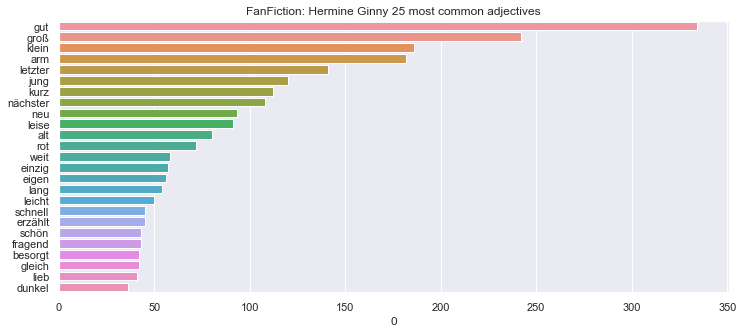

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.barplot(x=0, y=df2.index, data=df2)
plt.title("FanFiction: Hermine Ginny 25 most common adjectives")
plt.savefig("Kwic/images/FanFic/Interaktion/fanfic_Hermine_Ginny_adjectives.png", bbox_inches='tight')

### 2.7 Verteilung der Paare <a class="anchor" id="tuple_fan"></a>

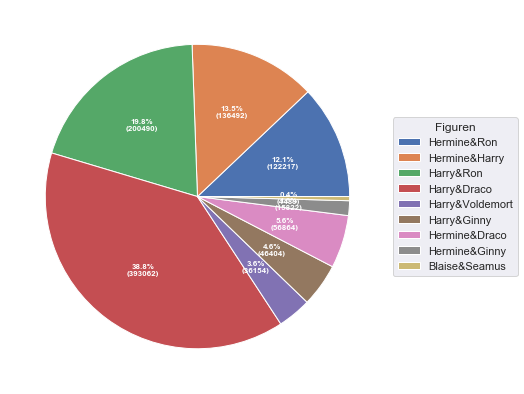

In [60]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"))

recipe = ["122217 Hermine&Ron",
          "136493 Hermine&Harry",
          "200491 Harry&Ron",
          "393063  Harry&Draco", 
         "36154 Harry&Voldemort",'46404 Harry&Ginny', '56865 Hermine&Draco', '15822 Hermine&Ginny',
         "4440 Blaise&Seamus", ]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Figuren",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")


plt.savefig("Kwic/images/FanFic/PiePlot/fanfic_verteilung_tuples.png", bbox_inches='tight')

Besonders auffällig hier ist der große Anteil von Harry und Draco, gefolgt von Harry und Ron. Im Vergleich zu der HP-Reihe wurde eine Interaktion zwischen Blaise und Seamus erkannt. 